In [605]:
#importing the necessary modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [606]:
#reading the data file as dataframe
data = pd.read_csv("C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Bridging Imaging Users to Imaging Analysis - 2022 (Responses) - Form Responses 1_copy.csv")

In [879]:
#Creating a dictionary to rename
dict_rename = {
    'Which of the following roles best describes you?':'Role', 
    'Which of the following do you have significant formal training in or experience with? Select all that apply.':'Training', 
    'Where do you currently primarily work?':'Location', 
    'How would you describe your work?':'Work description', 
    'How would you rate your computational skills?':'Level of computational skills', 
    'How would you rate your comfort in developing new computational skills?':'Comfort in developing computational skills', 
    'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.':'Approach to solutions', 
    'How frequently do you use scripting to solve image analysis problems?':'Frequency of script usage', 
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Scholarly "best practices" article]':'Preferable instructional methods articles',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Written step-by-step tutorial]':'Preferable instructional methods written tutorials',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Video tutorial]':'Preferable instructional methods Video tutorial',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Interactive webinar]':'Preferable instructional methods Interactive webinar',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [One-on-one "office hours" with an expert]':'Preferable instructional methods Office hours',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [In person seminar/tutorial lasting <1 day]':'Preferable instructional methods Seminar 1day',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Multiday workshop]':'Preferable instructional methods Multiday workshop',
    'How interested are you in learning more about the following topics? [Image analysis theory]':'Interes in topics Image analysis theory',
    'How interested are you in learning more about the following topics? [General image analysis practices]':'Interest in topics Image analysis practices',
    'How interested are you in learning more about the following topics? [Image analysis practices related to my (sub) discipline]':'Interest in topics related to sub discipline',
    'How interested are you in learning more about the following topics? [Learning to use a particular software tool]':'Interest in topics Specific software tool',
    'How interested are you in learning more about the following topics? [Deep learning as applied to image analysis]':'Interest in topics Deep learning for image analysis',
    'How interested are you in learning more about the following topics? [Analyzing large images/large numbers of images]':'Interest in topics Analyzing large images',
    'How interested are you in learning more about the following topics? [Visualizing image analysis results]':'Interest in topics Visualization of results',
    'The next question will ask you about particular image analysis tools and techniques. Do you want to answer questions about microscopy in the field/area of life sciences or physical sciences?':'Microscopy for life sciences physical sciences',
    'What image analysis tools have you used before? (check all that apply)':'usage of image analysis tools',
    'What image analysis tools do you use the most?':'Most used image analysis tools',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from manually selected fields]':'Types of images analyzed Brightfield/DIC/phase-contrast manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from an automated microscope (such as a high content imager)]':'Types of images analyzed Brightfield/DIC/phase-contrast automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from manually selected fields]':'Types of images analyzed-Fluorescent images manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from an automated microscope (such as a high content imager)]':'Types of images analyzed automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Histologically stained tissue sections]':'Types of images analyzed-Histological tissue sections',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Electron microscopy]':'Types of images analyzed-Electro microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging mass spectrometry]':'Types of images analyzed-Imaging mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging flow cytometry]':'Types of images analyzed-Imaging flow cytometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Superresolution (PALM/STORM)]':'Types of images analyzed-Superresolution (PALM/STORM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Autofluorescence imaging (ie FLIM)]':'Types of images analyzed-Autofluorescence imaging (ie FLIM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Other]':'Types of images analyzed-Other',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you think are generally well-solved?':'Well solved image analysis problems',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions',
    'What image analysis tools have you used before? (check all that apply)':'Commonly used image analysis tools',
    'What image analysis tools do you use the most?':'Most used image analysis tools_physical sciences',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Optical microscopy/DIC/fractography]':'Types of images analyzed-Optical microscopy/DIC/fractography',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Scanning electron microscopy (secondary electron or back scattered imaging)]':'Types of images analyzed-Scanning electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Transmission electron microscopy (including electron diffraction and STEM imaging, e.g. HAADF-STEM)]':'Types of images analyzed-Transmission electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Spectroscopy/diffractive imaging in the SEM/TEM (eg. EDS, EBSD, EELS, CL)]':'Types of images analyzed-Spectroscopy/diffractive imaging in the SEM/TEM',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Imaging with mass spectrometry (eg SIMS/APT)]':'Types of images analyzed-Imaging with mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply)? [X-ray microscopy (including tomography)]':'Types of images analyzed-X-ray microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [FM imaging, force spectroscopy, single molecule force spectroscopy]':'Types of images analyzed-FM imaging force spectroscopy single molecule force spectroscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Fluorescence microscopy]':'Types of images analyzed-Fluorescence microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Other]':'Types of images analyzed Other',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you think are generally well-solved?':'Well solved image analysis problems-physical sciences',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions physical sciences',
    'Where did you hear about this survey? Please select all that apply.':'hear about this survey',
    'Please select any of the following you have attended in the past':'Previous experience',
    'Are there any image analysis workshops, tutorials, or conferences you are aware of and attended or considered attending? If so, how many?':'Number of conferences/workshops attended',
    'How would you most prefer to be notified about image analysis workshops, sessions, or conferences being planned?':'Notification of image analysis workshop',
    'Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful?  If yes, what made them beneficial?':'Experience with previous workshops/conferences',
    'Are there any conferences you\'ve attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?':'Recommended conferences/workshops',
    'What specific topics (i.e. overviews of a particular tool, comparisons between pieces of software, or how to use a certain tool for a certain kind of experiment) would you like to see prioritized for future image analysis workshop and tutorial offerings?':'Topics of interest',
    'What do you think analysis tool CREATORS (such as software developers) could/should do to make image analysis better and more successful? How best could we encourage them to do it?':'Creators role',
    'What do you think analysis tool USERS (such as microscopists) could/should do to make image analysis better and more successful?  How best could we encourage them to do it?':'Users role',
    'Any other thoughts?':'Other thoughts',
    'Would you be interested in subscribing to a mailing list (announcing workshops, new tools, collaboration opportunities, etc) for EITHER the Center for Open Bioimage Analysis OR Bioimaging North America OR the Royal Microscopical society? If yes, you will be taken to a page to subscribe, if not this form will submit.':'Subscription'
    }

In [880]:
#renaming the columbs of the dictionary
data.rename(columns=dict_rename, inplace=True)

In [609]:
# pie chart for the roles of the survey participants 
role_pie_chart = px.pie(data, values=data.Role.value_counts(), names=data.Role.value_counts().index, title="Roles of image analysis users", width=800, height=500)
role_pie_chart.update_traces(insidetextorientation = 'radial')
role_pie_chart.update_layout(title_x=0.5)

In [610]:
demographics = data["Location"]

In [611]:
#Geo chart for the location of the participants
demographics_chart = px.scatter_geo(demographics, locations=['AUT', 'USA', 'KGZ', 'BRA', 'AUS','TCD'], size= data.Location.value_counts(), projection="natural earth", color = data.Location.value_counts().index, title="Location of the users", labels={'color':'Continent'}, width=800, height=500)
demographics_chart.update_layout(title_x=0.5)

In [881]:
# Bar chart for the mostly used image analysis tools 
counts_tools = data["Most used image analysis tools"].value_counts()
most_used_tools = px.bar(data, y=counts_tools.index, x=counts_tools.values, color=counts_tools.values, title ="Usage of image analysis tools", color_continuous_scale='Pinkyl', labels = {"x":"Number of users", "y":""}, text_auto=True, width=1000, height=500)
most_used_tools.update_layout(title_x=0.5)

In [780]:
# how users would like to ne notfied for future workshops
counts_notifications = data["Notification of image analysis workshop"].value_counts()
notifications = px.scatter(data, y=counts_notifications.index, x=counts_notifications.values, size=counts_notifications.values,orientation='v', width=1000, height=500)
notifications.update_layout(title_x=0.5)


In [789]:
# Whether users wanted to subscribe to the mailing list
subscription = data["Subscription"].value_counts()
subscription_graph = px.bar(data, x=subscription.index, y=subscription.values, labels={"x":"Preference", "y":'Numbers'}, width=1000, height=500)
subscription_graph.update_layout(title_x=0.5)

In [800]:
#Script usage for image analysis 
frequency =  data["Frequency of script usage"].value_counts()
frequency = px.bar(data, x=frequency.index, y=frequency.values, labels={'x':'Frequency', 'y':'Counts'}, width=1000, height=500,color_continuous_scale='Fall', text_auto= True, title="Frequency of script usage for image analysis")
frequency.update_layout(title_x=0.5)

In [802]:
#Conferences attended
df = data["Number of conferences/workshops attended"]
conferences = df.value_counts()
conferences_attended = px.bar(df, x=conferences.index, y=conferences.values, color_continuous_scale='Fall', text_auto=True, labels = {'x':'Conferences attended','y':'Number of participants'})
conferences_attended.update_layout(title_x=0.5)

In [618]:
# The domains in which the participants work wrt the roles
data["Training"] = data["Training"].astype(str)

In [619]:
data['Cell/Molecular Biology'] = data['Training'].apply(lambda x: True if 'Cell/Molecular Biology' in x else False)
data['Physics/Biophysics'] = data["Training"].apply(lambda x: True if 'Physics/Biophysics'in x else False)
data['Chemistry/Biochemistry'] = data["Training"].apply(lambda x: True if 'Chemistry/Biochemistry'in x else False)
data['Statistics/Biostatistics'] =data['Training'].apply(lambda x: True if 'Statistics/Biostatistics' in x else False)
data['Medicine'] = data['Training'].apply(lambda x: True if 'Medicine' in x else False)
data['Computer science'] = data['Training'].apply(lambda x: True if 'Computer science' in x else False)
data['Computer vision'] = data['Training'].apply(lambda x: True if 'Computer vision' in x else False)
data['Deep learning'] = data['Training'].apply(lambda x: True if 'Deep learning' in x else False)
data['Developmental Biology'] = data['Training'].apply(lambda x: True if 'Developmental Biology' in x else False)

In [620]:
df_Cell_Molecular_Biology = data.loc[:, ["Role","Cell/Molecular Biology"]]

,Role,Cell/Molecular Biology
0,Research scientist,False
1,Undergraduate/Graduate student,False
2,Facility director,True
3,Principal investigator,True
4,Undergraduate/Graduate student,True


In [621]:
Cell_Molecular_Biology = df_Cell_Molecular_Biology.groupby("Role").sum().reset_index()
Cell_Molecular_Biology

,Role,Cell/Molecular Biology
0,Clinician,2
1,Facility director,41
2,Facility staff,64
3,Image/data analyst,21
4,Postdoctoral fellow,59
5,Principal investigator,49
6,Research scientist,48
7,Undergraduate/Graduate student,81


In [622]:
df_Physics_Biophysics = data.loc[:, ["Role", "Physics/Biophysics"]]
df_Physics_Biophysics.head()

,Role,Physics/Biophysics
0,Research scientist,False
1,Undergraduate/Graduate student,False
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,True


In [623]:
Physics_Biophysics = df_Physics_Biophysics.groupby("Role").sum().reset_index()
Physics_Biophysics

,Role,Physics/Biophysics
0,Clinician,0
1,Facility director,12
2,Facility staff,10
3,Image/data analyst,13
4,Postdoctoral fellow,16
5,Principal investigator,20
6,Research scientist,17
7,Undergraduate/Graduate student,20


In [624]:
df_Chemistry_Biochemistry =data.loc[:, ["Role", "Chemistry/Biochemistry"]]
df_Chemistry_Biochemistry.head()

,Role,Chemistry/Biochemistry
0,Research scientist,True
1,Undergraduate/Graduate student,False
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,False


In [625]:
Chemistry_Biochemistry = df_Chemistry_Biochemistry.groupby("Role").sum().reset_index()
Chemistry_Biochemistry

,Role,Chemistry/Biochemistry
0,Clinician,1
1,Facility director,12
2,Facility staff,17
3,Image/data analyst,8
4,Postdoctoral fellow,18
5,Principal investigator,22
6,Research scientist,21
7,Undergraduate/Graduate student,20


In [626]:
df_Statistics_Biostatistics = data.loc[:, ["Role","Statistics/Biostatistics"]]
df_Statistics_Biostatistics.head()

,Role,Statistics/Biostatistics
0,Research scientist,False
1,Undergraduate/Graduate student,True
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,True


In [627]:
Statistics_Biostatistics = df_Statistics_Biostatistics.groupby("Role").sum().reset_index()
Statistics_Biostatistics

,Role,Statistics/Biostatistics
0,Clinician,3
1,Facility director,3
2,Facility staff,7
3,Image/data analyst,15
4,Postdoctoral fellow,10
5,Principal investigator,10
6,Research scientist,7
7,Undergraduate/Graduate student,19


In [628]:
df_Medicine = data.loc[:, ["Role", "Medicine"]]
df_Medicine.head()

,Role,Medicine
0,Research scientist,False
1,Undergraduate/Graduate student,False
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,False


In [629]:
Medicine = df_Medicine.groupby("Role").sum().reset_index()
Medicine

,Role,Medicine
0,Clinician,5
1,Facility director,2
2,Facility staff,5
3,Image/data analyst,6
4,Postdoctoral fellow,4
5,Principal investigator,4
6,Research scientist,2
7,Undergraduate/Graduate student,12


In [630]:
df_Computer_science = data.loc[:,["Role", "Computer science"]]
df_Computer_science.head()

,Role,Computer science
0,Research scientist,False
1,Undergraduate/Graduate student,False
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,True


In [631]:
Computer_science = df_Computer_science.groupby("Role").sum().reset_index()
Computer_science

,Role,Computer science
0,Clinician,0
1,Facility director,3
2,Facility staff,10
3,Image/data analyst,20
4,Postdoctoral fellow,12
5,Principal investigator,7
6,Research scientist,9
7,Undergraduate/Graduate student,15


In [632]:
df_Computer_vision = data.loc[:, ["Role", "Computer vision"]]
df_Computer_vision.head()

,Role,Computer vision
0,Research scientist,False
1,Undergraduate/Graduate student,False
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,True


In [633]:
Computer_vision = df_Computer_vision.groupby("Role").sum().reset_index()
Computer_vision

,Role,Computer vision
0,Clinician,1
1,Facility director,2
2,Facility staff,6
3,Image/data analyst,14
4,Postdoctoral fellow,3
5,Principal investigator,4
6,Research scientist,8
7,Undergraduate/Graduate student,8


In [634]:
df_Deep_learning = data.loc[:, ["Role", "Deep learning"]]
df_Deep_learning.head()

,Role,Deep learning
0,Research scientist,False
1,Undergraduate/Graduate student,True
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,True


In [635]:
Deep_learning = df_Deep_learning.groupby("Role").sum().reset_index()
Deep_learning

,Role,Deep learning
0,Clinician,0
1,Facility director,1
2,Facility staff,3
3,Image/data analyst,12
4,Postdoctoral fellow,5
5,Principal investigator,4
6,Research scientist,5
7,Undergraduate/Graduate student,10


In [636]:
df_Developmental_Biology = data.loc[:, ["Role", "Developmental Biology"]]
df_Developmental_Biology.head()

,Role,Developmental Biology
0,Research scientist,False
1,Undergraduate/Graduate student,False
2,Facility director,False
3,Principal investigator,False
4,Undergraduate/Graduate student,False


In [637]:
Developmental_Biology = df_Developmental_Biology.groupby("Role").sum().reset_index()
Developmental_Biology

,Role,Developmental Biology
0,Clinician,1
1,Facility director,13
2,Facility staff,20
3,Image/data analyst,6
4,Postdoctoral fellow,22
5,Principal investigator,22
6,Research scientist,20
7,Undergraduate/Graduate student,23


In [638]:
#concatenating the dataframes wrt roles and domains
df_role_domain = pd.concat([Cell_Molecular_Biology, Physics_Biophysics, Chemistry_Biochemistry, Statistics_Biostatistics, Medicine, Computer_science, Computer_vision, Deep_learning, Developmental_Biology], axis=1)

In [639]:
df_role_domain.head()

,Role,Cell/Molecular Biology,Role,Physics/Biophysics,Role,Chemistry/Biochemistry,Role,Statistics/Biostatistics,Role,Medicine,Role,Computer science,Role,Computer vision,Role,Deep learning,Role,Developmental Biology
0,Clinician,2,Clinician,0,Clinician,1,Clinician,3,Clinician,5,Clinician,0,Clinician,1,Clinician,0,Clinician,1
1,Facility director,41,Facility director,12,Facility director,12,Facility director,3,Facility director,2,Facility director,3,Facility director,2,Facility director,1,Facility director,13
2,Facility staff,64,Facility staff,10,Facility staff,17,Facility staff,7,Facility staff,5,Facility staff,10,Facility staff,6,Facility staff,3,Facility staff,20
3,Image/data analyst,21,Image/data analyst,13,Image/data analyst,8,Image/data analyst,15,Image/data analyst,6,Image/data analyst,20,Image/data analyst,14,Image/data analyst,12,Image/data analyst,6
4,Postdoctoral fellow,59,Postdoctoral fellow,16,Postdoctoral fellow,18,Postdoctoral fellow,10,Postdoctoral fellow,4,Postdoctoral fellow,12,Postdoctoral fellow,3,Postdoctoral fellow,5,Postdoctoral fellow,22


In [640]:
df_role_domain = df_role_domain.T.drop_duplicates().T

In [641]:
df_role_domain.head()

,Role,Cell/Molecular Biology,Physics/Biophysics,Chemistry/Biochemistry,Statistics/Biostatistics,Medicine,Computer science,Computer vision,Deep learning,Developmental Biology
0,Clinician,2,0,1,3,5,0,1,0,1
1,Facility director,41,12,12,3,2,3,2,1,13
2,Facility staff,64,10,17,7,5,10,6,3,20
3,Image/data analyst,21,13,8,15,6,20,14,12,6
4,Postdoctoral fellow,59,16,18,10,4,12,3,5,22


In [804]:
role=df_role_domain["Role"]

fig = go.Figure(data=[
    go.Scatter(name='Developmental Biology', x=role, y=df_role_domain["Developmental Biology"]),
    go.Scatter(name='Deep learning', x=role, y=df_role_domain["Deep learning"]),
    go.Scatter(name='Computer vision', x=role, y=df_role_domain["Computer vision"]),
    go.Scatter(name="Computer science", x=role, y=df_role_domain["Computer science"]),
    go.Scatter(name="Medicine", x=role, y=df_role_domain["Medicine"]),
    go.Scatter(name="Statistics/Biostatistics", x=role, y=df_role_domain["Statistics/Biostatistics"]),
    go.Scatter(name="Chemistry/Biochemistry", x=role, y=df_role_domain["Chemistry/Biochemistry"]),
    go.Scatter(name="Physics/Biophysics", x=role, y=df_role_domain["Physics/Biophysics"]), 
    go.Scatter(name="Cell/Molecular Biology", x=role, y=df_role_domain["Cell/Molecular Biology"])
])
# Change the bar mode

fig.show()

In [643]:
x=role

fig = go.Figure(go.Bar(name='Developmental Biology', y=role, x=df_role_domain["Developmental Biology"], orientation='h', insidetextanchor='end'))
fig.add_trace(go.Bar(name='Deep learning', y=role, x=df_role_domain["Deep learning"], orientation='h'))
fig.add_trace(go.Bar(name='Computer vision', y=role, x=df_role_domain["Computer vision"],  orientation='h'))
fig.add_trace(go.Bar(name="Computer science", y=role, x=df_role_domain["Computer science"],  orientation='h'))
fig.add_trace(go.Bar(name="Medicine", y=role, x=df_role_domain["Medicine"],  orientation='h'))
fig.add_trace(go.Bar(name="Statistics/Biostatistics", y=role, x=df_role_domain["Statistics/Biostatistics"],  orientation='h'))
fig.add_trace(go.Bar(name="Chemistry/Biochemistry", y=role, x=df_role_domain["Chemistry/Biochemistry"],  orientation='h'))
fig.add_trace(go.Bar(name="Physics/Biophysics", y=role, x=df_role_domain["Physics/Biophysics"],  orientation='h'))
fig.add_trace(go.Bar(name="Cell/Molecular Biology", y=role, x=df_role_domain["Cell/Molecular Biology"],  orientation='h'))

fig.update_layout(barmode='stack')
fig.show()

In [644]:
#Work description
data["Imaging"] = data.eval("`Work description` < 3")
data["Balanced"] = data.eval("`Work description` in [3,4,5]")
data["Analyst"] = data.eval("`Work description` > 5")

In [645]:
Work_type = [sum(data["Imaging"]), sum(data["Balanced"]), sum(data["Analyst"])]
Work_type

[81, 322, 90]

In [646]:
# creating a column for work type
data.loc[data["Work description"] < 3, "Work type" ] = "Imaging"
data.loc[(data["Work description"] >= 3) & (data["Work description"] < 5), "Work type"] = "Balanced"
data.loc[data["Work description"] >= 5, "Work type"] = "Analyst"

In [647]:
work_type_counts = data["Work type"].value_counts()
work_type_counts 

Balanced    273
Analyst     139
Imaging      81
Name: Work type, dtype: int64

In [648]:
# creating a column for knowledge in computational skills 
data.loc[data["Level of computational skills"] < 3, "Knowledge of computational skills"] = "Low"
data.loc[(data["Level of computational skills"] >= 3) & (data["Level of computational skills"] < 5), "Knowledge of computational skills"] = "Medium"
data.loc[data["Level of computational skills"] >= 5, "Knowledge of computational skills"] = "High"

In [649]:
computational_knowledge = data["Knowledge of computational skills"].value_counts()
computational_knowledge

High      244
Medium    183
Low        66
Name: Knowledge of computational skills, dtype: int64

In [650]:
work_comp_1 = data["Work type"]
work_comp_2 = data["Knowledge of computational skills"]
work_comp = pd.concat([work_comp_1, work_comp_2], axis=1)


In [651]:
work_comp_grouped = work_comp.groupby("Work type").value_counts().reset_index()
work_comp_grouped = work_comp_grouped.rename(columns={0:'Counts'})
work_comp_grouped

,Work type,Knowledge of computational skills,Counts
0,Analyst,High,102
1,Analyst,Medium,27
2,Analyst,Low,10
3,Balanced,High,118
4,Balanced,Medium,118
5,Balanced,Low,37
6,Imaging,Medium,38
7,Imaging,High,24
8,Imaging,Low,19


In [652]:
work_comp_sunburst = px.sunburst(work_comp_grouped, path=["Work type", 'Knowledge of computational skills'], values='Counts')
work_comp_sunburst.update_traces(textinfo="label+percent parent")

In [653]:
# Comfort in developing new computational skills
data.loc[data["Comfort in developing computational skills"] < 3, 'Comfort'] = 'Low'
data.loc[(data['Comfort in developing computational skills'] >= 3) & (data['Comfort in developing computational skills'] < 5), 'Comfort'] = "Medium"
data.loc[data['Comfort in developing computational skills'] >= 5 , 'Comfort'] = "High"

In [654]:
comfort_newskills = data["Comfort"].value_counts()
comfort_newskills

High      291
Medium    134
Low        68
Name: Comfort, dtype: int64

Figure out ways to analyze the knowledge on computational skills with comfort in developing new comp skills  

In [697]:
#trial for tenary plots to compare the computational knowledge vs comfort in developing new comp skills wrt work type
fig = px.scatter_ternary(data, a="Level of computational skills", b="Comfort in developing computational skills", c="Work description", hover_name="Work type",
    color="Work type", size='Level of computational skills',
    )
fig.update_ternaries(sum=10, aaxis_min=1)
fig.show()

In [655]:
data["Approach to solutions"] = data["Approach to solutions"].astype(str)

In [656]:
# Ways people analyze data 

data['Play with a tool'] = data['Approach to solutions'].apply(lambda x: True if 'Sit down with a tool I know and start playing with the data' in x else False)
data["Ask a friend or colleague"] = data["Approach to solutions"].apply(lambda x: True if 'Ask a friend or colleague to help me'in x else False)
data["Ask on image sc forum"] = data["Approach to solutions"].apply(lambda x: True if 'Ask on forum.image.sc'in x else False)
data['Google'] = data["Approach to solutions"].apply(lambda x: True if 'Google' in x else False)
data["Particluar websites"] = data["Approach to solutions"].apply(lambda x:True if "particular website" in x else False)
data["Scientific literature"] = data["Approach to solutions"].apply(lambda x: True if 'scientific literature' in x else False)

In [657]:
ways_people_analyze_data = data.columns
ways_people_analyze_data_subset = ways_people_analyze_data[-6:]
ways_people_analyze_data_values= [data["Play with a tool"].sum(), data["Ask a friend or colleague"].sum(), data["Ask on image sc forum"].sum(), data["Google"].sum(), data["Particluar websites"].sum(), data["Scientific literature"].sum()]

In [658]:
ways_people_analyze_data_scatter = px.scatter(x=ways_people_analyze_data_subset, y =ways_people_analyze_data_values, size=ways_people_analyze_data_values, color=ways_people_analyze_data_values, labels={'x':'', 'y':'Number of users'}, width =1000, height=500)

In [659]:
ways_people_analyze_data_scatter 

In [673]:
#Preferable instructional methods 
fig = go.Figure(go.Scatter(name='Best practices articles', y=data["Preferable instructional methods articles"].value_counts().values, x=data["Preferable instructional methods articles"].value_counts().index, mode='markers'))
fig.add_trace(go.Scatter(name='Written tutorial', y=data["Preferable instructional methods written tutorials"].value_counts().values, x=data["Preferable instructional methods written tutorials"].value_counts().index, mode='markers'))
fig.add_trace(go.Scatter(name='Video tutorial', y=data["Preferable instructional methods Video tutorial"].value_counts().values, x=data["Preferable instructional methods Video tutorial"].value_counts().index, mode='markers'))
fig.add_trace(go.Scatter(name='Interactive webinar', y=data["Preferable instructional methods Interactive webinar"].value_counts().values, x=data["Preferable instructional methods Interactive webinar"].value_counts().index, mode='markers'))
fig.add_trace(go.Scatter(name='Office hours', y=data["Preferable instructional methods Office hours"].value_counts().values, x=data["Preferable instructional methods Office hours"].value_counts().index, mode='markers'))
fig.add_trace(go.Scatter(name='One day seminar', y=data["Preferable instructional methods Seminar 1day"].value_counts().values, x=data["Preferable instructional methods Seminar 1day"].value_counts().index, mode='markers'))
fig.add_trace(go.Scatter(name='Multiday workshop', y=data["Preferable instructional methods Multiday workshop"].value_counts().values, x=data["Preferable instructional methods Multiday workshop"].value_counts().index, mode='markers'))

fig.update_layout(title="Preferable instructional methods", title_x=0.5)

Split the preferable methods based on the computational skills


In [977]:
#comparing the instructional methods with the computational skills 
mtds_skills_data = data.iloc[:, 10:17]
mtds_skills_data = pd.concat([mtds_skills_data, data["Knowledge of computational skills"]], axis=1)
mtds_skills_data.columns

Index(['Preferable instructional methods articles',
       'Preferable instructional methods written tutorials',
       'Preferable instructional methods Video tutorial',
       'Preferable instructional methods Interactive webinar',
       'Preferable instructional methods Office hours',
       'Preferable instructional methods Seminar 1day',
       'Preferable instructional methods Multiday workshop',
       'Knowledge of computational skills'],
      dtype='object')

In [982]:
mtds_skills_data_1=mtds_skills_data.iloc[:,1].value_counts()

In [983]:
mtds_skills_data_1

Very preferable          290
Moderately preferable    147
Somewhat preferable       53
Not at all preferable      3
Name: Preferable instructional methods written tutorials, dtype: int64

In [663]:
#Interest in various topics

interest_df = data.iloc[:,17:24]

In [664]:
interest_df.columns

Index(['Interes in topics Image analysis theory',
       'Interest in topics Image analysis practices',
       'Interest in topics related to sub discipline',
       'Interest in topics Specific software tool',
       'Interest in topics Deep learning for image analysis',
       'Interest in topics Analyzing large images',
       'Interest in topics Visualization of results'],
      dtype='object')

In [684]:
interest_area_chart = go.Figure()

interest_area_chart.add_trace(go.Scatter(
    x=interest_df["Interes in topics Image analysis theory"].value_counts().index, y=interest_df["Interes in topics Image analysis theory"].value_counts().values,
    mode='lines',
    stackgroup='one',
    hoverinfo='x+y'
    ))

interest_area_chart.add_trace(go.Scatter(
    x=interest_df["Interest in topics Image analysis practices"].value_counts().index, y=interest_df["Interest in topics Image analysis practices"].value_counts().values,
    mode='lines',
    stackgroup='one',
    hoverinfo='x+y'
    ))

In [708]:
trial_radar = data["Interes in topics Image analysis theory"].value_counts().to_frame()

In [709]:
trial_radar

,Interes in topics Image analysis theory
Very interested,157
Moderately interested,150
Somewhat interested,147
Not at all interested,39


In [711]:
trial_radar_1=data["Interest in topics Image analysis practices"].value_counts().to_frame()

In [712]:
trial_radar_1

,Interest in topics Image analysis practices
Very interested,227
Moderately interested,188
Somewhat interested,69
Not at all interested,9


In [719]:
trial_radar_2=data["Interest in topics related to sub discipline"].value_counts().to_frame()
trial_radar_2

,Interest in topics related to sub discipline
Very interested,341
Moderately interested,109
Somewhat interested,36
Not at all interested,7


In [729]:
trial_radar_3

,Interest in topics Specific software tool
Very interested,223
Moderately interested,171
Somewhat interested,82
Not at all interested,17


In [731]:
trial_radar_4

,Interest in topics Deep learning for image analysis
Very interested,207
Moderately interested,143
Somewhat interested,114
Not at all interested,29


In [732]:
trial_radar_5

,Interest in topics Visualization of results
Very interested,281
Moderately interested,154
Somewhat interested,51
Not at all interested,7


In [722]:
trial_radar_3=data["Interest in topics Specific software tool"].value_counts().to_frame()
trial_radar_4=data["Interest in topics Deep learning for image analysis"].value_counts().to_frame()
trial_radar_5=data["Interest in topics Analyzing large images"].value_counts().to_frame()
trial_radar_5=data["Interest in topics Visualization of results"].value_counts().to_frame()

In [749]:
trial = pd.concat([trial_radar, trial_radar_1, trial_radar_2, trial_radar_3, trial_radar_4, trial_radar_5], axis=1)

In [750]:
trial

,Interes in topics Image analysis theory,Interest in topics Image analysis practices,Interest in topics related to sub discipline,Interest in topics Specific software tool,Interest in topics Deep learning for image analysis,Interest in topics Visualization of results
Very interested,157,227,341,223,207,281
Moderately interested,150,188,109,171,143,154
Somewhat interested,147,69,36,82,114,51
Not at all interested,39,9,7,17,29,7


In [751]:
trial =trial.reset_index()

In [752]:
trial

,index,Interes in topics Image analysis theory,Interest in topics Image analysis practices,Interest in topics related to sub discipline,Interest in topics Specific software tool,Interest in topics Deep learning for image analysis,Interest in topics Visualization of results
0,Very interested,157,227,341,223,207,281
1,Moderately interested,150,188,109,171,143,154
2,Somewhat interested,147,69,36,82,114,51
3,Not at all interested,39,9,7,17,29,7


In [759]:
trial = trial.rename(columns={'index':'interest'})

In [806]:
trial

,interest,Interes in topics Image analysis theory,Interest in topics Image analysis practices,Interest in topics related to sub discipline,Interest in topics Specific software tool,Interest in topics Deep learning for image analysis,Interest in topics Visualization of results
0,Very interested,157,227,341,223,207,281
1,Moderately interested,150,188,109,171,143,154
2,Somewhat interested,147,69,36,82,114,51
3,Not at all interested,39,9,7,17,29,7


In [805]:
# showing the interests through waffles:)
from pywaffle import Waffle

In [808]:
plot_labels = [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interes in topics Image analysis theory'])]

In [854]:
colours = ['slateblue', 'limegreen', 'red', 'grey']

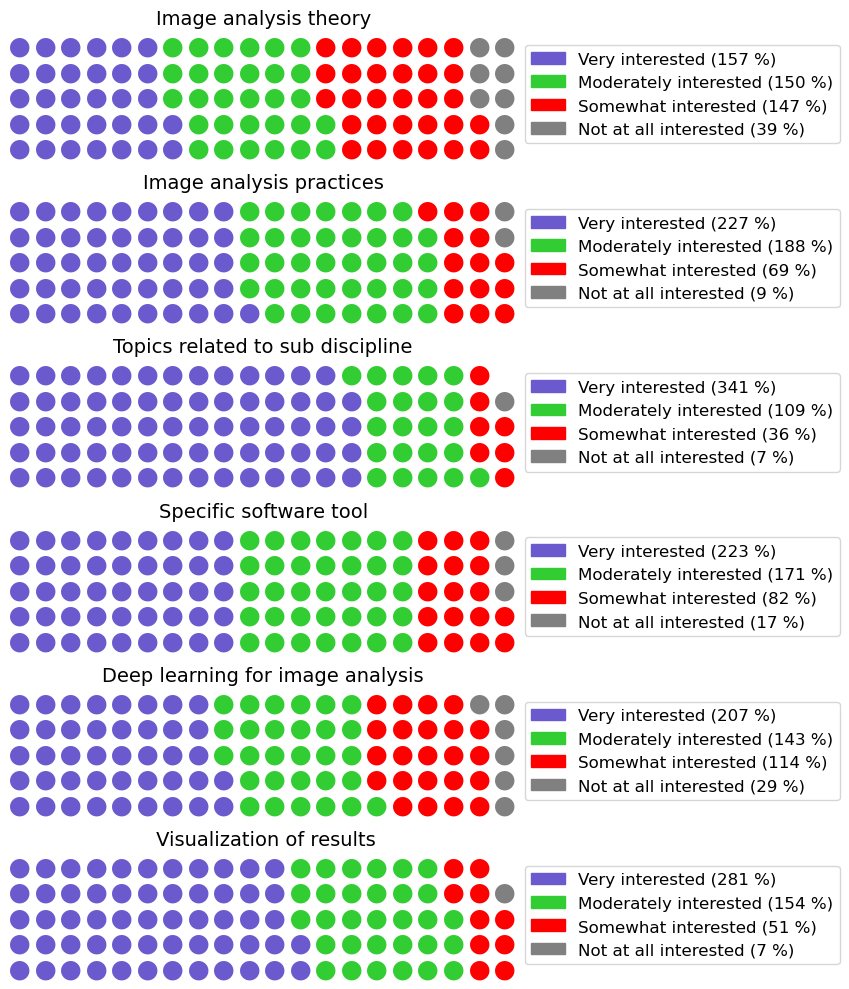

In [855]:
fig = plt.figure(FigureClass=Waffle, 
                 plots = {611: {'values':list(trial['Interes in topics Image analysis theory']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interes in topics Image analysis theory'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Image analysis theory', 'fontsize':14},
                                'icons':'circle'
                               },
                               
                          612: {
                              'values':list(trial['Interest in topics Image analysis practices']),
                              'labels': [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interest in topics Image analysis practices'])],
                                        
                              'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                              'title':{'label':'Image analysis practices', 'fontsize':14},
                              'icons':'circle'
                          },

                          613:{'values':list(trial['Interest in topics related to sub discipline']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interest in topics related to sub discipline'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Topics related to sub discipline', 'fontsize':14},
                                'icons':'circle'

                          },

                          614:{'values':list(trial['Interest in topics Specific software tool']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interest in topics Specific software tool'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Specific software tool', 'fontsize':14},
                                'icons':'circle'

                          },

                          615:{'values':list(trial['Interest in topics Deep learning for image analysis']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interest in topics Deep learning for image analysis'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':'Deep learning for image analysis', 'fontsize':14},
                                'icons':'circle'
                          },

                          616:{'values':list(trial['Interest in topics Visualization of results']),
                               'labels': [f'{i} ({str(j)} %)' for i,j in zip(trial['interest'],trial['Interest in topics Visualization of results'])],
                               'legend':{'loc':'center left', 'bbox_to_anchor': (1.0, 0.5), 
                                          'ncol':1, 'fontsize':12},
                                'title':{'label':' Visualization of results', 'fontsize':14},
                                'icons':'circle'

                          }
                         },
                 figsize=(10,10), 
                 rows=5, 
                 columns = 20, 
                 colors=colours)
                 
plt.tight_layout()
plt.show()

In [849]:
life_physical_data

0      Physical Sciences
1          Life Sciences
2          Life Sciences
3          Life Sciences
4      Physical Sciences
             ...        
489        Life Sciences
490        Life Sciences
491        Life Sciences
492        Life Sciences
493        Life Sciences
Name: Microscopy for life sciences physical sciences, Length: 494, dtype: object

In [850]:
data["life_physical"] =life_physical_data.str.contains("Life", case=False)

In [852]:
life_physical_chart = data["life_physical"].value_counts()

True     459
False     35
Name: life_physical, dtype: int64

In [887]:
data.iloc[:,24]

0      Physical Sciences
1          Life Sciences
2          Life Sciences
3          Life Sciences
4      Physical Sciences
             ...        
489        Life Sciences
490        Life Sciences
491        Life Sciences
492        Life Sciences
493        Life Sciences
Name: Microscopy for life sciences physical sciences, Length: 494, dtype: object

In [862]:
#What image analysis tools have you used before?

#Commonly used image analysis tools
data['Commonly used image analysis tools'] = data['Commonly used image analysis tools'].astype(str)
data["Commercial software with the microscope"] = data['Commonly used image analysis tools'].apply(lambda x: True if 'Columbus' in x else False)
data["Other commercial software"] = data['Commonly used image analysis tools'].apply(lambda x: True if 'Imaris' in x else False)
data["Open source point-and-click software"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'FIJI' in x else False)
data["Computational libraries and scripts"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'MATLAB' in x else False)
data["Tools_none"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'None' in x else False)

In [878]:
data["Usgae of image anlysis tools"]

KeyError: 'Usgae of image anlysis tools'

In [864]:
data["Commercial software with the microscope"].sum()

307

In [877]:
y = [data["Commercial software with the microscope"].sum(), data["Other commercial software"].sum(),
data["Open source point-and-click software"].sum(), data["Computational libraries and scripts"].sum(), data["Tools_none"].sum()]
fig = px.scatter(x=["Commercial software with the microscope", 'Other commercial software','Open source point-and-click software', 'Computational libraries and scripts', 'Tools_none'], y=[data["Commercial software with the microscope"].sum(), data["Other commercial software"].sum(),
data["Open source point-and-click software"].sum(), data["Computational libraries and scripts"].sum(), data["Tools_none"].sum()], color=y, size=y, size_max=90)
                
                                 
fig.update_layout(width=900, height=320, title="Commonly used image analysis tools", title_x=0.5,
                  margin = dict(t=50, l=0, r=0, b=0),
                  showlegend=True
                 )
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

In [ ]:
type_of_images.iloc[:,1].value_counts()

In [897]:
# Kinds of images 
#Types of images analyzed Brightfield/DIC/phase-contrast manually acquired
type_of_images = data.iloc[:, 27:38]

In [899]:
type_of_images

,Types of images analyzed Brightfield/DIC/phase-contrast manually acquired,Types of images analyzed Brightfield/DIC/phase-contrast automated,Types of images analyzed-Fluorescent images manually acquired,Types of images analyzed automated,Types of images analyzed-Histological tissue sections,Types of images analyzed-Electro microscopy,Types of images analyzed-Imaging mass spectrometry,Types of images analyzed-Imaging flow cytometry,Types of images analyzed-Superresolution (PALM/STORM),Types of images analyzed-Autofluorescence imaging (ie FLIM),Types of images analyzed-Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2D + time,2D + time,2D + time,2D + time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2D,2D,3D + time,3D + time,2D,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,"2D, 3D (<3000x3000x100)",NaN,2D,2D,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
489,NaN,NaN,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",NaN,NaN,NaN,NaN,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",NaN,NaN
490,2D,NaN,"2D, 2D + time, 3D + time","2D, 2D + time, 3D + time",2D,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,2D,NaN,NaN,NaN,NaN,NaN,NaN
492,2D,"2D + time, 3D + time",2D + time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3D (<3000x3000x100)


In [990]:
df0 = type_of_images.iloc[:,0].value_counts()
df1 = type_of_images.iloc[:,1].value_counts()
df2 = type_of_images.iloc[:,2].value_counts()
df3 = type_of_images.iloc[:,3].value_counts()
df4 = type_of_images.iloc[:,4].value_counts()
df5 = type_of_images.iloc[:,5].value_counts()
df6 = type_of_images.iloc[:,6].value_counts()
df7 = type_of_images.iloc[:,7].value_counts()
df8 = type_of_images.iloc[:,8].value_counts()
df9 = type_of_images.iloc[:,9].value_counts()
df10 = type_of_images.iloc[:,10].value_counts()

In [991]:
df_compiled = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)

In [996]:
df_compiled["Types of images"] = df_compiled.index

In [997]:
df_compiled

,Types of images analyzed Brightfield/DIC/phase-contrast manually acquired,Types of images analyzed Brightfield/DIC/phase-contrast automated,Types of images analyzed-Fluorescent images manually acquired,Types of images analyzed automated,Types of images analyzed-Histological tissue sections,Types of images analyzed-Electro microscopy,Types of images analyzed-Imaging mass spectrometry,Types of images analyzed-Imaging flow cytometry,Types of images analyzed-Superresolution (PALM/STORM),Types of images analyzed-Autofluorescence imaging (ie FLIM),Types of images analyzed-Other,Types of images
2D,94.0,46.0,51.0,48.0,164.0,70.0,24.0,19.0,24.0,18.0,5.0,2D
"2D, 2D + time",61.0,47.0,23.0,23.0,2.0,NaN,NaN,1.0,8.0,10.0,2.0,"2D, 2D + time"
2D + time,50.0,32.0,17.0,15.0,5.0,1.0,1.0,2.0,8.0,11.0,2.0,2D + time
"2D, 2D + time, 3D (<3000x3000x100), 3D + time",14.0,7.0,44.0,25.0,1.0,NaN,NaN,NaN,9.0,6.0,3.0,"2D, 2D + time, 3D (<3000x3000x100), 3D + time"
3D + time,8.0,8.0,28.0,15.0,5.0,1.0,1.0,2.0,3.0,6.0,3.0,3D + time
3D (<3000x3000x100),6.0,4.0,25.0,10.0,7.0,5.0,2.0,3.0,9.0,4.0,5.0,3D (<3000x3000x100)
"2D, 3D (<3000x3000x100)",5.0,4.0,34.0,10.0,18.0,18.0,2.0,NaN,20.0,4.0,1.0,"2D, 3D (<3000x3000x100)"
3D large volume + time,4.0,3.0,10.0,6.0,NaN,3.0,1.0,1.0,2.0,1.0,1.0,3D large volume + time
"2D, 2D + time, 3D + time",3.0,4.0,8.0,6.0,NaN,NaN,NaN,1.0,3.0,3.0,NaN,"2D, 2D + time, 3D + time"
"3D (<3000x3000x100), 3D + time",3.0,NaN,14.0,6.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"3D (<3000x3000x100), 3D + time"


In [1010]:
fig_com = go.Figure()

fig_com.add_trace(go.Bar(name='Brightfield/DIC/phase-contrast manually acquired', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"], orientation='h'))
fig_com.add_trace(go.Bar(name='Brightfield/DIC/phase-contrast automated', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed Brightfield/DIC/phase-contrast automated"], orientation='h'))
fig_com.add_trace(go.Bar(name='Fluorescent images-manually acquired', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Fluorescent images manually acquired"], orientation='h'))
fig_com.add_trace(go.Bar(name='Fluorescent images-automated', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed automated"], orientation='h'))
fig_com.add_trace(go.Bar(name='Histological tissue sections', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Histological tissue sections"], orientation='h'))
fig_com.add_trace(go.Bar(name='Electro microscopy', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Electro microscopy"], orientation='h'))
fig_com.add_trace(go.Bar(name='Imaging mass spectrometry', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Imaging mass spectrometry"], orientation='h'))
fig_com.add_trace(go.Bar(name='Imaging flow cytometry', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Imaging flow cytometry"], orientation='h'))
fig_com.add_trace(go.Bar(name='Superresolution (PALM/STORM)', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Superresolution (PALM/STORM)"], orientation='h'))
fig_com.add_trace(go.Bar(name='Autofluorescence imaging (ie FLIM)', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Autofluorescence imaging (ie FLIM)"], orientation='h'))
fig_com.add_trace(go.Bar(name='Other', y=df_compiled["Types of images"], x = df_compiled["Types of images analyzed-Other"], orientation='h'))

fig_com.update_layout(barmode='stack')

In [ ]:
import csv
import json
import pandas as pd

reader = csv.reader(open("../List_tags_WellSolved.csv", "r"))
set_of_tags = []
for a_line in reader:
    _ = []
    for __ in a_line:
        if __:
            _.append(__)
    set_of_tags.append(_)
    # ['Trainable', 'AI', 'ML']
    print(a_line)

feature_columns = {"input_sentences": []}
for _ in set_of_tags:
    col_name = ";".join(_)
    feature_columns[col_name] = []
json.dump(feature_columns, open("feature_names.json", "w"), indent=4)

input_file_name = "WellSolved.csv"
reader = open("../%s" % input_file_name, encoding="ISO-8859-1")
sentences = []
for sentence in reader:
    sentence = sentence.replace("\n", "")
    if not sentence:
        continue
    sentences.append(sentence)
    sentence_lower = sentence.lower()
    for a_feature_name in feature_columns:
        tags = a_feature_name.split(";")
        seen_feature = 0
        for a_tag in tags:
            if a_tag.lower() in sentence_lower:
                seen_feature = 1
        feature_columns[a_feature_name].append(seen_feature)
    print(sentence)
feature_columns["input_sentences"] = sentences
json.dump(feature_columns, open("feature_names.json", "w"), indent=4)

data_output = pd.DataFrame(feature_columns)
data_output.to_csv("../%s" % (input_file_name.replace(".csv", "_counts.csv")), index=False)

In [1011]:
well_solved = data["Well solved image analysis problems"].str.lower().str.split()
well_solved

0                                                    NaN
1                                                    NaN
2                          [segmentation, and, tracking]
3          [basic, segmentation, esp, in, cell, culture]
4                                                    NaN
                             ...                        
489                                                  NaN
490    [finding, nuclei, stained, with, dapi, and, th...
491                                    [finding, nuclei]
492                                    [finding, nuclei]
493                                                  NaN
Name: Well solved image analysis problems, Length: 494, dtype: object

In [1016]:
results = set()
well_solved = well_solved.dropna(how='all')
well_solved.apply(results.update)
print(results)

{'parts', 'discrete', '(none', 'dimensions', 'fluorescent', 'rendering', 'which', 'yeast', 'people', 'puncta', 'there).', 'rod', 'using', 'above', 'organelles', 'works', 'micrographs,', 'nuclei/cell', 'high', 'moving', 'visualization', 'time', 'foci,', 'filopodia', 'go).', 'problems)', 'registration/alignment', 'follows.', '2d', '(neutrophils).', 'data', 'particle', 'separation', 'nuclei', 'quantifying', 'until', 'considering', 'cell', '(though', 'none', 'confluency', 'samples', 'tracing', 'fluorescently-labelled', 'every', 'color', 'sets', 'good.', '3d', 'sample', 'data,', 'localiying', 'do', 'fluorescence', 'cells,', 'where', 'image', 'we', 'static', 'classification', 'organelles.', 'fluo', 'types', 'had', 'localisation', 'connectomics', 'depends', 'lots', '(thanks', 'signal', 'occupied', 'so', 'identification', 'intervention', 'cellcounting,', 'intensities', 'measurements', 'analysis,', 'large', 'otherwise,', 'molecule', 'proteins', 'organelle', 'real', 'your', 'detection', 'border'

In [1017]:
from collections import Counter

In [1018]:
results = Counter()
well_solved = well_solved.dropna(how='all')
well_solved.apply(results.update)
print(results)

Counter({'nuclei': 112, 'finding': 95, 'segmentation': 55, 'and': 40, 'cell': 39, 'of': 33, 'in': 32, 'counting': 26, '2d': 24, 'analysis': 23, 'nuclei,': 21, 'segmentation,': 20, 'cells': 20, 'is': 17, 'tracking': 16, 'to': 16, 'image': 13, 'for': 12, 'objects': 10, 'tissue': 10, 'or': 10, 'fluorescence': 10, 'segmenting': 10, 'basic': 9, 'well': 9, 'the': 9, 'detection': 8, 'with': 8, 'a': 7, 'images': 7, 'that': 7, 'not': 7, 'particle': 7, 'measuring': 7, 'on': 7, 'intensity': 6, 'counting,': 6, '3d': 6, 'nuclear': 6, 'denoising': 6, 'i': 6, 'nucleus': 5, 'high': 5, 'cells,': 5, 'fluorescent': 5, 'sparse': 5, 'within': 5, 'large': 5, 'object': 4, 'simple': 4, 'analysis,': 4, 'are': 4, 'most': 4, 'tracking,': 4, 'images,': 4, 'an': 4, 'be': 4, 'but': 4, 'other': 4, 'detection,': 4, 'types': 4, 'data': 4, 'has': 4, 'culture': 3, 'separated': 3, 'detecting': 3, 'round': 3, 'solved': 3, 'your': 3, 'sample': 3, 'single': 3, 'defined': 3, '&': 3, 'some': 3, 'mammalian': 3, 'contrast': 3, 

In [1024]:
x = {
  "name": "John",
  "age": 30,
  "married": True,
  "divorced": False,
  "children": ("Ann","Billy"),
  "pets": None,
  "cars": [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
}

print(json.dumps(x))

{"name": "John", "age": 30, "married": true, "divorced": false, "children": ["Ann", "Billy"], "pets": null, "cars": [{"model": "BMW 230", "mpg": 27.5}, {"model": "Ford Edge", "mpg": 24.1}]}


In [1025]:
json.dumps(x, indent=4)

'{\n    "name": "John",\n    "age": 30,\n    "married": true,\n    "divorced": false,\n    "children": [\n        "Ann",\n        "Billy"\n    ],\n    "pets": null,\n    "cars": [\n        {\n            "model": "BMW 230",\n            "mpg": 27.5\n        },\n        {\n            "model": "Ford Edge",\n            "mpg": 24.1\n        }\n    ]\n}'

In [1026]:
json.dumps(x, indent=4, separators=(". ", " = "))

'{\n    "name" = "John". \n    "age" = 30. \n    "married" = true. \n    "divorced" = false. \n    "children" = [\n        "Ann". \n        "Billy"\n    ]. \n    "pets" = null. \n    "cars" = [\n        {\n            "model" = "BMW 230". \n            "mpg" = 27.5\n        }. \n        {\n            "model" = "Ford Edge". \n            "mpg" = 24.1\n        }\n    ]\n}'